In [228]:
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Loading the Cleaned and Preprocessed Data

In [2]:
df = pd.read_csv("cleaneddata.csv")

In [3]:
df.shape

(4939643, 8)

In [4]:
df.head()

,fare_amount,passenger_count,year,month,day,hour,minute,total_distance
0,7.3,1,2011,11,21,8,12,1.797494
1,6.5,1,2012,2,9,10,8,1.747274
2,6.5,5,2012,12,30,17,4,0.868605
3,9.7,1,2010,5,3,6,22,2.144219
4,6.5,1,2013,10,12,22,39,0.994622


# Separating Predictors and Response Variable

In [5]:
X = df.iloc[:,1:8]

In [6]:
X.head()

,passenger_count,year,month,day,hour,minute,total_distance
0,1,2011,11,21,8,12,1.797494
1,1,2012,2,9,10,8,1.747274
2,5,2012,12,30,17,4,0.868605
3,1,2010,5,3,6,22,2.144219
4,1,2013,10,12,22,39,0.994622


In [7]:
y = df.iloc[:,0]

In [8]:
y.head()

0    7.3
1    6.5
2    6.5
3    9.7
4    6.5
Name: fare_amount, dtype: float64

# Splitting the Data into Training and Testing Sets

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

# Implementing Linear Regression Model

In [182]:
from sklearn.linear_model import LinearRegression

In [183]:
linear = LinearRegression()

In [184]:
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [185]:
prediction = linear.predict(X_test)

In [186]:
linearR2 = r2_score(y_test, prediction)
linearR2

0.6791810584738438

In [187]:
linearRMSE = mean_squared_error(y_test,prediction)
linearRMSE

6.217443204953769

Text(0.5, 0, 'Fare')

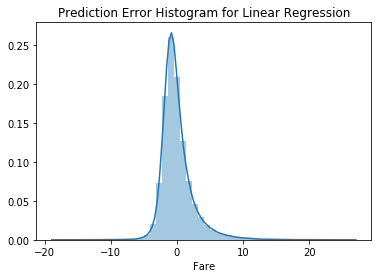

In [196]:
sns.distplot(y_test-prediction)
plt.title('Prediction Error Histogram for Linear Regression')
plt.xlabel('Fare')

# Implementing LASSO Regression Model

In [190]:
from sklearn.linear_model import Lasso

In [191]:
lasso = Lasso(alpha=0.1)

In [192]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [193]:
prediction = lasso.predict(X_test)

In [194]:
lassoR2 = r2_score(y_test,prediction)
lassoR2

0.678352884735168

In [195]:
lassoRMSE = mean_squared_error(y_test,prediction)
lassoRMSE

6.23349314003415

Text(0.5, 0, 'Fare')

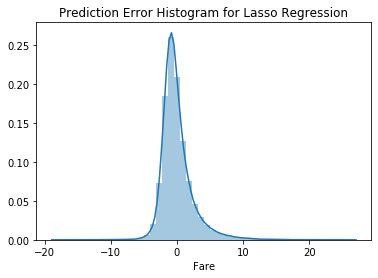

In [197]:
sns.distplot(y_test-prediction)
plt.title('Prediction Error Histogram for Lasso Regression')
plt.xlabel('Fare')

# Implementing Bayesian Ridge Regression Model 

In [198]:
from sklearn.linear_model import BayesianRidge

In [199]:
br = BayesianRidge()

In [200]:
br.fit(X_train,y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [201]:
prediction = br.predict(X_test)

In [202]:
brR2 = r2_score(y_test,prediction)
brR2

0.6791810589685243

In [203]:
brRMSE = mean_squared_error(y_test,prediction)
brRMSE

6.2174431953669025

Text(0.5, 0, 'Fare')

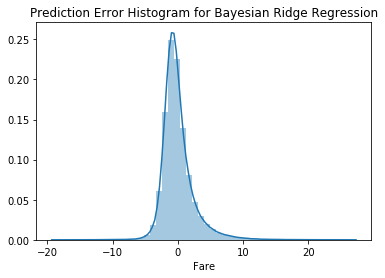

In [204]:
sns.distplot(y_test-prediction)
plt.title('Prediction Error Histogram for Bayesian Ridge Regression')
plt.xlabel('Fare')

# Implementing Random Forest Regression Model

In [172]:
from sklearn.ensemble import RandomForestRegressor

In [173]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20)

In [174]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [175]:
prediction = rf.predict(X_test)

In [176]:
rfR2 = r2_score(y_test,prediction)
rfR2

0.7107878458510035

In [177]:
rfRMSE = mean_squared_error(y_test,prediction)
rfRMSE

5.604906412476014

Text(0.5, 0, 'Fare')

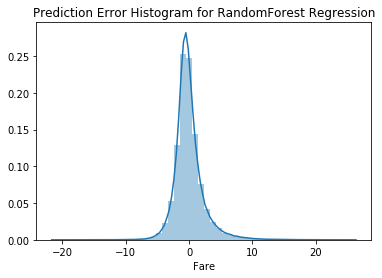

In [181]:
sns.distplot(y_test-prediction)
plt.title('Prediction Error Histogram for RandomForest Regression')
plt.xlabel('Fare')

# Implementing Gradient Boosting Regression Model

In [205]:
from sklearn.ensemble import GradientBoostingRegressor

In [206]:
gbr = GradientBoostingRegressor()

In [207]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [208]:
prediction = gbr.predict(X_test)

In [209]:
gbrR2 = r2_score(y_test,prediction)
gbrR2

0.7185316505382476

In [210]:
gbrRMSE = mean_squared_error(y_test,prediction)
gbrRMSE

5.454832150637987

Text(0.5, 0, 'Fare')

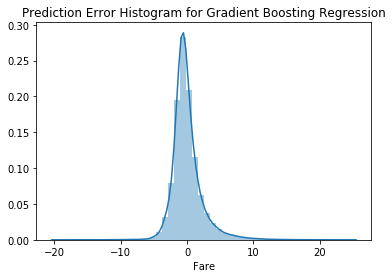

In [211]:
sns.distplot(y_test-prediction)
plt.title('Prediction Error Histogram for Gradient Boosting Regression')
plt.xlabel('Fare')

# Implementing AdaBoost Regression Model

In [212]:
from sklearn.ensemble import AdaBoostRegressor

In [213]:
ada = AdaBoostRegressor()

In [214]:
ada.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [215]:
prediction = ada.predict(X_test)

In [216]:
adaR2 = r2_score(y_test,prediction)
adaR2

0.5552900043157165

In [217]:
adaRMSE = mean_squared_error(y_test,prediction)
adaRMSE

8.618441067379567

Text(0.5, 0, 'Fare')

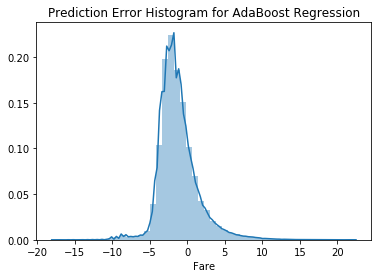

In [218]:
sns.distplot(y_test-prediction)
plt.title('Prediction Error Histogram for AdaBoost Regression')
plt.xlabel('Fare')

# Implementing K-Nearest Neighbours Regression

In [219]:
from sklearn.neighbors import KNeighborsRegressor

In [220]:
knn = KNeighborsRegressor(n_neighbors=10)

In [221]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [222]:
prediction = knn.predict(X_test)

In [224]:
knnR2 = r2_score(y_test,prediction)
knnR2

0.6366919574736668

In [225]:
knnRMSE = mean_squared_error(y_test,prediction)
knnRMSE

7.040878289682415

# Conclusion

In [231]:
scores = [['1', 'Linear Regression Model', linearR2, linearRMSE],
         ['2', 'LASSO Regression Model', lassoR2, lassoRMSE],
         ['3', 'Bayesian Ridge Regression Model', brR2, brRMSE],
         ['4', 'Random Forest Regression Model', rfR2, rfRMSE],
         ['5', 'Gradient Boosting Regression Model', gbrR2, gbrRMSE],
         ['6', 'AdaBoosting Regression Model', adaR2, adaRMSE],
         ['7', 'K-Nearest Neighbours Regression', knnR2, knnRMSE]]

In [232]:
 print (tabulate(scores, headers=["SR No.", "Model", "R2 Score", "RMSE"]))

  SR No.  Model                                 R2 Score     RMSE
--------  ----------------------------------  ----------  -------
       1  Linear Regression Model               0.679181  6.21744
       2  LASSO Regression Model                0.678353  6.23349
       3  Bayesian Ridge Regression Model       0.679181  6.21744
       4  Random Forest Regression Model        0.710788  5.60491
       5  Gradient Boosting Regression Model    0.718532  5.45483
       6  AdaBoosting Regression Model          0.55529   8.61844
       7  K-Nearest Neighbours Regression       0.636692  7.04088


# Random Forest Regression Model and Gradient Boosting Regression Model gives us best R2 score and least root mean square error. 